# Introduction

In [1]:
from molecule_scanner import msc


To use this program one must first setup the molecule that is to be scanned.

For this one needs a valid `.xyz` file as well as the atom numbers for the center, the z-axis as well as the xz plane.

Please note, that counting begins with 1 and not 0.









While this program allows you to set a specific directory as a workspace doing so is not advised.

Managing the created files manually is not a good idea and should be avoided.

In [2]:
msc_test = msc(
    # xyz_filepath="../test/data/nhc.xyz",
    xyz_filepath="../mad25_p.xyz",
    sphere_center_atom_ids=[1],
    z_ax_atom_ids=[2],
    xz_plane_atoms_ids=[1, 3, 9],
    atoms_to_delete_ids=[1],
    # working_dir=os.path.join(os.path.abspath("."), "test_directory")
)

To run a calculation at a single radius use the `.run_single` method.

This method provides a bunch of additional parameters, most of which have decent default arguments.


```sphere_radius (float): The radius of the sphere. 

displacement (float): Displacement of oriented molecule from sphere center in Angstrom (default 0.0)

mesh_size (float): Mesh size for numerical integration (default 0.10)

remove_H (bool): True/False Do not remove/remove H atoms from Vbur calculation (default True)

orient_z (bool): True/False Molecule oriented along negative/positive Z-axis (default True)

write_surf_files (bool): True/False Do not write/write files for top and bottom surfaces (default True)


In [3]:
total_results_without_H, quadrant_results_without_H, octant_results_without_H = msc_test.run_single(sphere_radius=3.5)

In [4]:
total_results_with_H, quadrant_results_with_H, octant_results_with_H = msc_test.run_single(sphere_radius=3.5, remove_H=False)

To view results use the `print` command.
You can also add additional text to make the output clearer.

In [5]:
print(total_results_without_H)

{'free_volume': 55.7, 'buried_volume': 123.8, 'total_volume': 179.4, 'exact_volume': 179.6, 'percent_buried_volume': 69.0, 'percent_free_volume': 31.0, 'percent_total_volume': 99.9}


In [6]:
print("This is the result with H: \n", total_results_with_H)

This is the result with H: 
 {'free_volume': 53.0, 'buried_volume': 126.5, 'total_volume': 179.4, 'exact_volume': 179.6, 'percent_buried_volume': 70.5, 'percent_free_volume': 29.5, 'percent_total_volume': 99.9}


The `run_range` function is designed to quickly scan a range of radii values.

Do not be alarmed by the `No volume could be found` warning, this simply means that the desired radius was too small or too large.
The program will function as desired even with a few values missing.

In [7]:
df_scan_1_63 = msc_test.run_range(r_min=1,r_max=6.3,nsteps=40, n_threads =-1)

No volume could be found for r = 1.4076923076923076, skipping output gathering.
No volume could be found for r = 1.0, skipping output gathering.
No volume could be found for r = 1.2717948717948717, skipping output gathering.
No volume could be found for r = 1.1358974358974359, skipping output gathering.
No volume could be found for r = 1.5435897435897434, skipping output gathering.
No volume could be found for r = 1.8153846153846154, skipping output gathering.
No volume could be found for r = 1.6794871794871793, skipping output gathering.
No volume could be found for r = 6.3, skipping output gathering.


With `.head()` one can take a look at the generated dataframe

In [8]:
df_scan_1_63.head(10)

,r,free_volume,buried_volume,total_volume,exact_volume,percent_buried_volume,percent_free_volume,percent_total_volume
0,1.951282,11.5,19.5,31.1,31.1,62.8,37.2,99.8
1,2.087179,14.1,23.9,38.0,38.1,62.9,37.1,99.9
4,2.223077,17.0,29.0,46.0,46.0,63.1,36.9,99.9
2,2.358974,19.9,35.1,54.9,55.0,63.8,36.2,99.9
3,2.494872,23.0,41.9,65.0,65.0,64.6,35.4,99.9
5,2.630769,26.4,49.8,76.3,76.3,65.4,34.6,100.0
8,2.766667,30.0,58.6,88.6,88.7,66.2,33.8,99.9
6,2.902564,33.7,68.4,102.2,102.4,67.0,33.0,99.7
7,3.038462,38.0,79.4,117.4,117.5,67.7,32.3,99.9
9,3.174359,42.6,91.4,134.0,134.0,68.2,31.8,100.0


This DataFrame object can also be directly saved as a csv file.

In [9]:
df_scan_1_63.to_csv("my_scv_name.csv")

# Visualisation of the results

The DataFrame object can be directly plotted in python.

When plotting in python one needs to pass the previously generated dataFrame to the `plot_graph` function.

Additionally one can choose which columns from the DataFrame are used for the plot creation by adding `y_data=total_volume` or `x_data=free_volume`.
Why one would do that I do not know.

By default the `percent_buried_volume` is plotted against the radius.

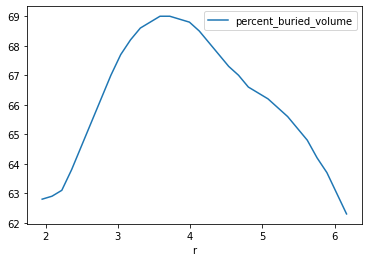

In [10]:
msc_test.plot_graph(df_scan_1_63)

To save a figure simply add the `save_fig="my_filename.png"` option.

It is also possible to change the x and y labels as well as the title.

Many more options can be found under: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

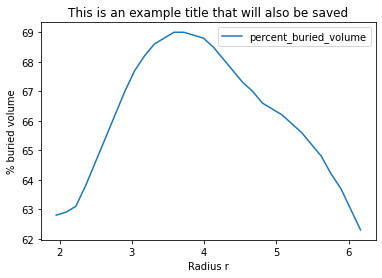

In [11]:
msc_test.plot_graph(
    df_scan_1_63,
    save_file="buried_volume_scan_1_63.png",
    title="This is an example title that will also be saved",
    xlabel="Radius r",
    ylabel="% buried volume",
)